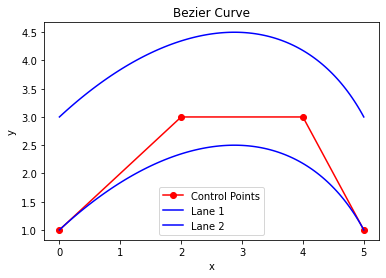

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def bezier_curve(points, t):
    if len(points) == 1:
        return points[0]
    else:
        new_points = []
        for i in range(len(points) - 1):
            new_points.append((1 - t) * points[i] + t * points[i + 1])
        return bezier_curve(new_points, t)

# Define control points
control_points = np.array([[0, 1], [2, 3], [4, 3], [5, 1]])

# Calculate curve points
t_values = np.linspace(0, 1, num=100)
curve_points = np.array([bezier_curve(control_points, t) for t in t_values])

lane_2 = curve_points + np.hstack((np.zeros((100,1)),np.ones((100,1))))*2

# Plot
plt.plot(control_points[:, 0], control_points[:, 1], 'ro-', label='Control Points')
plt.plot(curve_points[:, 0], curve_points[:, 1], 'b-', label='Lane 1')
plt.plot(lane_2[:, 0], lane_2[:, 1], 'b-', label='Lane 2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bezier Curve')
plt.show()


In [9]:
curve_points.shape

(100, 2)

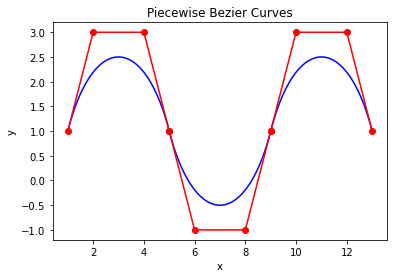

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def bezier_curve(points, t):
    if len(points) == 1:
        return points[0]
    else:
        new_points = []
        for i in range(len(points) - 1):
            new_points.append((1 - t) * points[i] + t * points[i + 1])
        return bezier_curve(new_points, t)

def plot_piecewise_bezier(control_points_list, t_values):
    for control_points in control_points_list:
        curve_points = np.array([bezier_curve(control_points, t) for t in t_values])
        plt.plot(curve_points[:, 0], curve_points[:, 1], 'b-')

# Define control points for multiple Bezier curves
control_points_list = [
    np.array([[1, 1], [2, 3], [4, 3], [5, 1]]),
    np.array([[5, 1], [6, -1], [8, -1], [9, 1]]),
    np.array([[9, 1], [10, 3], [12, 3], [13, 1]])
]

# Calculate and plot piecewise Bezier curves
t_values = np.linspace(0, 1, num=100)
plot_piecewise_bezier(control_points_list, t_values)

# Plot control points
for control_points in control_points_list:
    plt.plot(control_points[:, 0], control_points[:, 1], 'ro-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Bezier Curves')
plt.show()


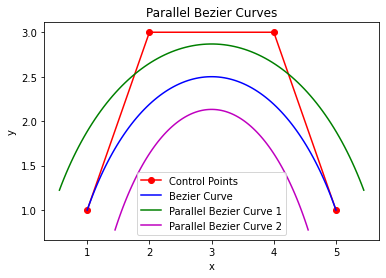

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def bezier_curve(points, t):
    if len(points) == 1:
        return points[0]
    else:
        new_points = []
        for i in range(len(points) - 1):
            new_points.append((1 - t) * points[i] + t * points[i + 1])
        return bezier_curve(new_points, t)

def offset_control_points(control_points, distance):
    n = len(control_points)
    if n <= 1:
        return control_points
    
    new_control_points = []
    
    for i in range(n):
        if i == 0:
            # Tangent at the first control point
            tangent = control_points[i + 1] - control_points[i]
        elif i == n - 1:
            # Tangent at the last control point
            tangent = control_points[i] - control_points[i - 1]
        else:
            # Tangent at the middle control points
            tangent = control_points[i + 1] - control_points[i - 1]
        
        normal = np.array([-tangent[1], tangent[0]])
        normal = normal / np.linalg.norm(normal)
        
        offset_point = control_points[i] + distance * normal
        new_control_points.append(offset_point)

    return np.array(new_control_points)

# Define control points
control_points = np.array([[1, 1], [2, 3], [4, 3], [5, 1]])

# Offset control points to create parallel curves
distance = 0.5
control_points_parallel_1 = offset_control_points(control_points, distance)
control_points_parallel_2 = offset_control_points(control_points, -distance)

# Calculate curve points
t_values = np.linspace(0, 1, num=100)
curve_points = np.array([bezier_curve(control_points, t) for t in t_values])
curve_points_parallel_1 = np.array([bezier_curve(control_points_parallel_1, t) for t in t_values])
curve_points_parallel_2 = np.array([bezier_curve(control_points_parallel_2, t) for t in t_values])

# Plot
plt.plot(control_points[:, 0], control_points[:, 1], 'ro-', label='Control Points')
plt.plot(curve_points[:, 0], curve_points[:, 1], 'b-', label='Bezier Curve')
plt.plot(curve_points_parallel_1[:, 0], curve_points_parallel_1[:, 1], 'g-', label='Parallel Bezier Curve 1')
plt.plot(curve_points_parallel_2[:, 0], curve_points_parallel_2[:, 1], 'm-', label='Parallel Bezier Curve 2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parallel Bezier Curves')
plt.show()


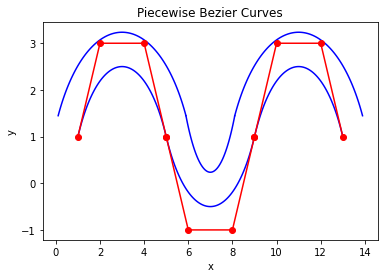

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def bezier_curve(points, t):
    if len(points) == 1:
        return points[0]
    else:
        new_points = []
        for i in range(len(points) - 1):
            new_points.append((1 - t) * points[i] + t * points[i + 1])
        return bezier_curve(new_points, t)

def plot_piecewise_bezier(control_points_list, t_values):
    curve_pts_arr = []
    for control_points in control_points_list:
        curve_points = np.array([bezier_curve(control_points, t) for t in t_values])
        plt.plot(curve_points[:, 0], curve_points[:, 1], 'b-')
        curve_pts_arr.append(curve_points)
    return curve_pts_arr

# Define control points for multiple Bezier curves
control_points_list = [
    np.array([[1, 1], [2, 3], [4, 3], [5, 1]]),
    np.array([[5, 1], [6, -1], [8, -1], [9, 1]]),
    np.array([[9, 1], [10, 3], [12, 3], [13, 1]])
]

dist = 1
offst_control_points_lst = [offset_control_points(ctrl_pnt, dist) for ctrl_pnt in control_points_list]

# Calculate and plot piecewise Bezier curves
t_values = np.linspace(0, 1, num=100)
l = plot_piecewise_bezier(control_points_list, t_values)
r = plot_piecewise_bezier(offst_control_points_lst, t_values)

# Plot control points
for control_points in control_points_list:
    plt.plot(control_points[:, 0], control_points[:, 1], 'ro-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Bezier Curves')
plt.show()


In [46]:
left_lane = np.vstack((l[0],l[1],l[2]))
right_lane = np.vstack((r[0],r[1],r[2]))
np.savetxt("top.csv", left_lane, delimiter=",")
np.savetxt("bottom.csv", right_lane, delimiter=",")

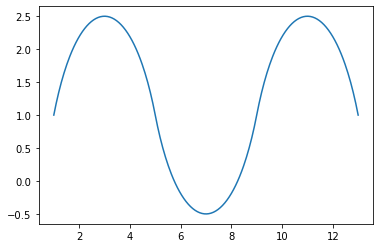

In [44]:
plt.plot(left_lane[:,0], left_lane[:,1])
plt.plot(right_lane[:,0], right_lane[:,1])

In [41]:
left_lane

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 1.03060706e+00,  1.05999388e+00],
       [ 1.06181394e+00,  1.11876339e+00],
       [ 1.09360826e+00,  1.17630854e+00],
       [ 1.12597766e+00,  1.23262932e+00],
       [ 1.15890978e+00,  1.28772574e+00],
       [ 1.19239224e+00,  1.34159780e+00],
       [ 1.22641268e+00,  1.39424549e+00],
       [ 1.26095874e+00,  1.44566881e+00],
       [ 1.29601803e+00,  1.49586777e+00],
       [ 1.33157820e+00,  1.54484236e+00],
       [ 1.36762689e+00,  1.59259259e+00],
       [ 1.40415171e+00,  1.63911846e+00],
       [ 1.44114031e+00,  1.68441996e+00],
       [ 1.47858031e+00,  1.72849709e+00],
       [ 1.51645936e+00,  1.77134986e+00],
       [ 1.55476508e+00,  1.81297827e+00],
       [ 1.59348510e+00,  1.85338231e+00],
       [ 1.63260706e+00,  1.89256198e+00],
       [ 1.67211859e+00,  1.93051729e+00],
       [ 1.71200733e+00,  1.96724824e+00],
       [ 1.75226090e+00,  2.00275482e+00],
       [ 1.79286694e+00,  2.03703704e+00],
       [ 1.

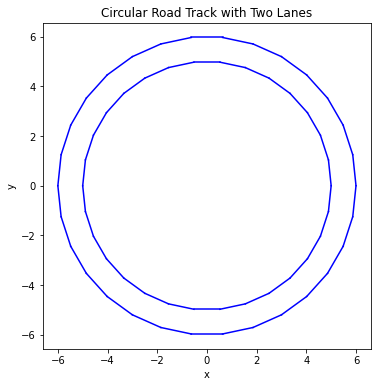

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def bezier_curve(points, t):
    if len(points) == 1:
        return points[0]
    else:
        new_points = []
        for i in range(len(points) - 1):
            new_points.append((1 - t) * points[i] + t * points[i + 1])
        return bezier_curve(new_points, t)

def circle_control_points(radius, center, num_segments):
    control_points = []
    angle_step = 2 * np.pi / num_segments

    for i in range(num_segments):
        angle = i * angle_step
        control_point = center + radius * np.array([np.cos(angle), np.sin(angle)])
        control_points.append(control_point)

    # Close the circle by adding the first control point again
    control_points.append(control_points[0])

    return np.array(control_points)

# Define circle parameters
inner_radius = 5
outer_radius = 6
center = np.array([0, 0])
num_segments = 30

# Create control points for inner and outer lanes
inner_control_points = circle_control_points(inner_radius, center, num_segments)
outer_control_points = circle_control_points(outer_radius, center, num_segments)

# Calculate and plot the circular road track with two lanes
t_values = np.linspace(0, 1, num=100)

plt.figure(figsize=(6, 6))

for i in range(num_segments):
    control_points_inner = inner_control_points[i:i+2]
    control_points_outer = outer_control_points[i:i+2]

    curve_points_inner = np.array([bezier_curve(control_points_inner, t) for t in t_values])
    curve_points_outer = np.array([bezier_curve(control_points_outer, t) for t in t_values])

    plt.plot(curve_points_inner[:, 0], curve_points_inner[:, 1], 'b-')
    plt.plot(curve_points_outer[:, 0], curve_points_outer[:, 1], 'b-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Circular Road Track with Two Lanes')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
